<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens once you have a solid baseline, layer in the star rating in your visualization(s). The key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
%pwd

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

In [5]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [6]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [8]:
shops['coffee_shop_name'].value_counts().head(10)

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Houndstooth Coffee                 200
Venezia Italian Gelato             200
Caffé Medici                       143
Apanas Coffee & Beer               136
TOMS                               100
Radio Coffee & Beer                100
Cuvée Coffee Bar                   100
Name: coffee_shop_name, dtype: int64

In [9]:
# grab date from the beginning of the review text
def get_date(text):
  return text.split(' ')[1]

shops['date'] = shops['full_review_text'].apply(get_date)

# turn date column strings into datetime objects
shops['date'] = pd.to_datetime(shops['date'], infer_datetime_format=True)

# Regex to extract only the number
shops['stars'] = shops['star_rating'].str.extract('(\d+)').astype(int)

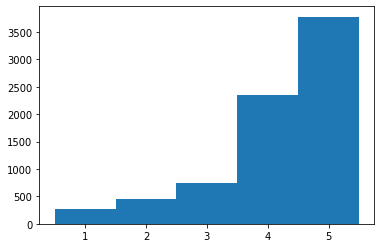

In [55]:
# most coffee shops get 4 or 5 star ratings.
hist_bin = [0.5,1.5,2.5,3.5,4.5,5.5]
shops['stars'].hist(bins=hist_bin);
plt.grid(False)

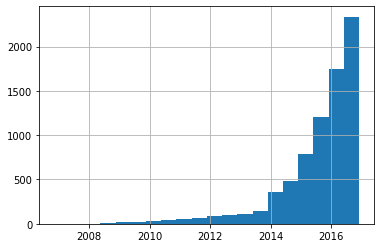

In [57]:
# histogram of review dates to see when most reviews were left
# just a little EDA
shops['date'].hist(bins=20);

In [10]:
import re
# considering using regex to remove dates
# you can create and test regular expressions on this online regex editor: https://regex101.com/
    
def clean_data(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document. 
    
    Parameters
    ----------
    text: string or object 
    
    Returns
    -------
    text: string or object
    """
    
    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]" 
    numerical_regex =  r"\b([1-9]|[12][0-9]|3[01])\b"  # match one or more digits
    
    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)

    # match one or more whitespace chars
    whitespace_regex = r"\s\s+"

    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(whitespace_regex, "", text)


    # apply case normalization
    text = text.lower()
    return text

In [13]:
shops

,coffee_shop_name,full_review_text,star_rating,date,stars,cleaned_review
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,checkin love love loved the atmosphere every c...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,4,listed in date night austin ambiance in austin...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,4,checkin listed in brunch spots i loved the ecl...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,2,very cool decor good drinks nice seatinghoweve...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,4,checkin they are located within the northcross...
...,...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2015-02-19,4,i actually step into this restaurant by chance...
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,2016-01-21,5,ok the steeping room is awesome how do they ha...
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,2015-04-30,4,loved coming here for tea and the atmosphere w...
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,2015-08-02,3,the food is just average the booths didnt feel...


In [12]:
shops['cleaned_review'] = shops['full_review_text'].apply(clean_data)

shops['cleaned_review'][0]

'checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutesi was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [15]:
# with a for loop
tokens = []
for review in shops['cleaned_review']:
  tokens.append(review.split(' '))

shops['tokens'] = tokens

shops.head()

,coffee_shop_name,full_review_text,star_rating,date,stars,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,4,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,2,very cool decor good drinks nice seatinghoweve...,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,4,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor..."


In [16]:
# provided function from lecture to get word counts and some statistics about the most common tokens
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [20]:
wc = count(shops['tokens'])

In [21]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,the,6799,32456,1.0,0.043099,0.043099,0.892726
5,and,6830,26197,2.0,0.034788,0.077887,0.896796
13,a,6214,22364,3.0,0.029698,0.107584,0.815914
15,i,5328,17780,4.0,0.023610,0.131195,0.699580
63,to,5645,17042,5.0,0.022630,0.153825,0.741203
...,...,...,...,...,...,...,...
34710,everthat,1,1,34712.0,0.000001,0.999995,0.000131
34711,actualitythe,1,1,34713.0,0.000001,0.999996,0.000131
34707,crassill,1,1,34714.0,0.000001,0.999997,0.000131
34715,digestion,1,1,34715.0,0.000001,0.999999,0.000131


In [22]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5346500995276585

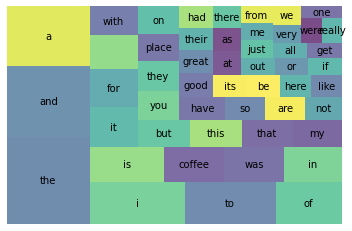

In [23]:
wc_top20 = wc[wc['rank'] <= 50]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shop has a rating between 1 & 3 based on the ratings distribution. A 'good' coffee shop is a 4 or 5. 

In [24]:
nlp = spacy.load('en_core_web_lg')

In [103]:
# Adding Stop Words to the list
STOP_WORDS = nlp.Defaults.stop_words.union(['i','I','it',"it's",'it.','the','this','1','Austin','shop'])

In [104]:
shops

,coffee_shop_name,full_review_text,star_rating,date,stars,cleaned_review,tokens,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, 1, check, Love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,4,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, list, Date, Night, Austin, ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, 1, check, Listed, Brunch, Spots, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,2,very cool decor good drinks nice seatinghoweve...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,4,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, 1, check, locate, Northcross, mall..."
...,...,...,...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2015-02-19,4,i actually step into this restaurant by chance...,"[i, actually, step, into, this, restaurant, by...","[2/19/2015, actually, step, restaurant, chance..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,2016-01-21,5,ok the steeping room is awesome how do they ha...,"[ok, the, steeping, room, is, awesome, how, do...","[1/21/2016, ok, Steeping, Room, awesome, great..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,2015-04-30,4,loved coming here for tea and the atmosphere w...,"[loved, coming, here, for, tea, and, the, atmo...","[4/30/2015, love, come, tea, atmosphere, prett..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,2015-08-02,3,the food is just average the booths didnt feel...,"[the, food, is, just, average, the, booths, di...","[8/2/2015, food, average, booth, feel, clean, ..."


In [105]:
# this will take longer to run than a regex method because Spacy is doing a fair amount
# of extra stuff under the hood in creating the token attributes and everything.

def spacy_tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas 
    
    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!
    
    See list of flags here: https://spacy.io/api/token#attributes
    
    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized 
    """
    tokens = []
    for token in nlp(text):
        # if statement will filter out stopwords, punctuation, and whitespace
        # COMPLETE THE CODE HERE
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS) and (token.is_space == False):
            tokens.append(token.lemma_)
            # Now lemmatize!

    
    return tokens

In [106]:
shops['full_review_text'][10]

' 10/22/2016 1 check-in Listed in Americano This is not your average cute study spot cafe.  Location/ Atmosphere: + Easy parking at the lot + Cute and classy interior decor! + Plenty of seats available (couches, swings, high chairs, etc) + Games like chess & tic tac toe available - No sign of outlets/ charging port on the walls - No wifi available - Not a study cafe unless you have all your papers printed out and don\'t need the internet  Service: o You order by yourself using an iPad up at the counter. + There are 3 iPads available making lines go by faster. + You can request them to text you upon your order being ready + When I told one of the baristas that the fork bin was empty, he kindly brought it over to our table along with a couple of knives! - There was no option to make drinks half sweetened/ less ice on the iPad screen :"(  Food/ Prices: + Highly recommend the Matcha Latte (it was thick and made to perfection!) + The chicken and waffle was well seasoned! + Aesthetically sup

In [107]:
shops['spacy_tokens'] = shops['full_review_text'].apply(spacy_tokenizer)

In [108]:
shops

,coffee_shop_name,full_review_text,star_rating,date,stars,cleaned_review,tokens,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, check, Love, love, love, atmosphe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,4,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, list, Date, Night, Austin, ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, check, Listed, Brunch, Spots, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,2,very cool decor good drinks nice seatinghoweve...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,4,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, check, locate, Northcross, mall, s..."
...,...,...,...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2015-02-19,4,i actually step into this restaurant by chance...,"[i, actually, step, into, this, restaurant, by...","[2/19/2015, actually, step, restaurant, chance..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,2016-01-21,5,ok the steeping room is awesome how do they ha...,"[ok, the, steeping, room, is, awesome, how, do...","[1/21/2016, ok, Steeping, Room, awesome, great..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,2015-04-30,4,loved coming here for tea and the atmosphere w...,"[loved, coming, here, for, tea, and, the, atmo...","[4/30/2015, love, come, tea, atmosphere, prett..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,2015-08-02,3,the food is just average the booths didnt feel...,"[the, food, is, just, average, the, booths, di...","[8/2/2015, food, average, booth, feel, clean, ..."


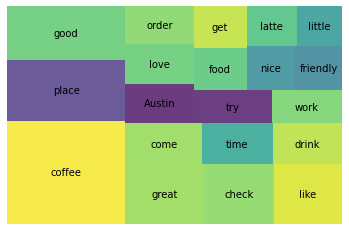

In [109]:
# # YOUR CODE HERE

wc = count(shops['spacy_tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [110]:
# Complete code here
good = shops.loc[shops['stars']>= 4]
bad = shops.loc[shops['stars']< 4]

In [111]:
shops['stars']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: stars, Length: 7616, dtype: int32

In [112]:
good

,coffee_shop_name,full_review_text,star_rating,date,stars,cleaned_review,tokens,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, check, Love, love, love, atmosphe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,4,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, list, Date, Night, Austin, ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, check, Listed, Brunch, Spots, lov..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,4,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, check, locate, Northcross, mall, s..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,2016-11-20,4,checkin very cute cafe i think from the moment...,"[checkin, very, cute, cafe, i, think, from, th...","[11/20/2016, check, cute, cafe, think, moment,..."
...,...,...,...,...,...,...,...,...
7610,The Steeping Room,3/1/2016 Great food! I haven't had a meal I d...,5.0 star rating,2016-03-01,5,great food i havent had a meal i did not enjoy...,"[great, food, i, havent, had, a, meal, i, did,...","[3/1/2016, great, food, meal, enjoy, clean, gr..."
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2015-02-19,4,i actually step into this restaurant by chance...,"[i, actually, step, into, this, restaurant, by...","[2/19/2015, actually, step, restaurant, chance..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,2016-01-21,5,ok the steeping room is awesome how do they ha...,"[ok, the, steeping, room, is, awesome, how, do...","[1/21/2016, ok, Steeping, Room, awesome, great..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,2015-04-30,4,loved coming here for tea and the atmosphere w...,"[loved, coming, here, for, tea, and, the, atmo...","[4/30/2015, love, come, tea, atmosphere, prett..."


In [113]:
# make sure that all reviews are accounted for in one of the two groups
assert shops.shape[0] == good.shape[0] + bad.shape[0]

In [114]:
# Dataframe of good word counts with ranks
good_wc = count(good["spacy_tokens"])
good_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,3890,7959,1.0,0.027862,0.027862,0.633550
111,place,3122,4795,2.0,0.016786,0.044647,0.508469
183,good,2872,4250,3.0,0.014878,0.059525,0.467752
112,great,2492,3449,4.0,0.012074,0.071599,0.405863
13,check,2685,2940,5.0,0.010292,0.081891,0.437296
189,like,1678,2435,6.0,0.008524,0.090415,0.273290
25,love,1547,2004,7.0,0.007015,0.097430,0.251954
59,Austin,1543,1986,8.0,0.006952,0.104382,0.251303
398,come,1464,1962,9.0,0.006868,0.111251,0.238436
402,time,1342,1771,10.0,0.006200,0.117450,0.218567


In [115]:
# Dataframe of bad word counts with ranks
bad_wc = count(bad["spacy_tokens"])
bad_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,coffee,910,2077,1.0,0.025984,0.025984,0.616531
25,place,752,1225,2.0,0.015325,0.041310,0.509485
14,good,647,996,3.0,0.012460,0.053770,0.438347
18,like,596,945,4.0,0.011822,0.065592,0.403794
84,order,439,768,5.0,0.009608,0.075200,0.297425
164,come,450,644,6.0,0.008057,0.083257,0.304878
23,drink,363,611,7.0,0.007644,0.090901,0.245935
487,time,419,606,8.0,0.007581,0.098482,0.283875
81,check,489,527,9.0,0.006593,0.105076,0.331301
49,food,319,502,10.0,0.006280,0.111356,0.216125


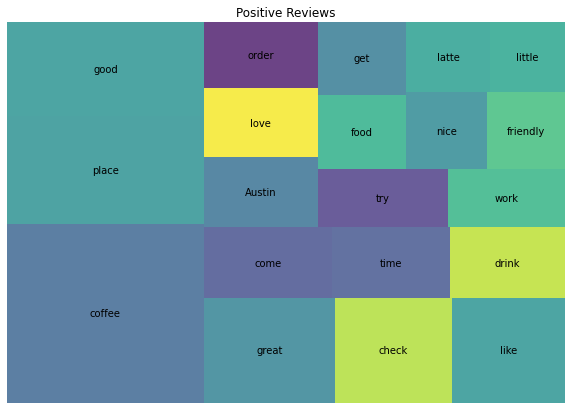

In [131]:
# COMPLETE CODE HERE
good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.title("Positive Reviews")
plt.axis('off')
plt.show()

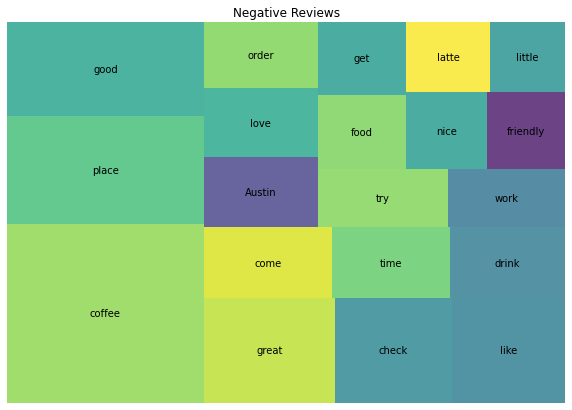

In [132]:
bad_top20 = bad_wc[bad_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

In [125]:
# these are words that are ranked high in one data set but not the other 
good_words = ['good','love','food','friendly','like','nice']

In [126]:
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,3890,7959,1.0,0.027862,0.027862,0.633550
111,place,3122,4795,2.0,0.016786,0.044647,0.508469
183,good,2872,4250,3.0,0.014878,0.059525,0.467752
112,great,2492,3449,4.0,0.012074,0.071599,0.405863
13,check,2685,2940,5.0,0.010292,0.081891,0.437296


In [127]:
df_pos_keywords_mask = good_wc.word.isin(good_words)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
183,good,2872,4250,3.0,0.014878,0.059525,0.467752
189,like,1678,2435,6.0,0.008524,0.090415,0.273290
25,love,1547,2004,7.0,0.007015,0.097430,0.251954
170,friendly,1437,1512,14.0,0.005293,0.140103,0.234039
49,nice,1206,1425,15.0,0.004988,0.145092,0.196417


In [133]:
# these are words that are ranked high in one data set but not the other 
bad_words = ['order','time','food','check','little']

In [134]:
df_neg_keywords_mask = bad_wc.word.isin(bad_words)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
84,order,439,768,5.0,0.009608,0.075200,0.297425
487,time,419,606,8.0,0.007581,0.098482,0.283875
81,check,489,527,9.0,0.006593,0.105076,0.331301
49,food,319,502,10.0,0.006280,0.111356,0.216125
281,little,207,254,35.0,0.003178,0.218470,0.140244


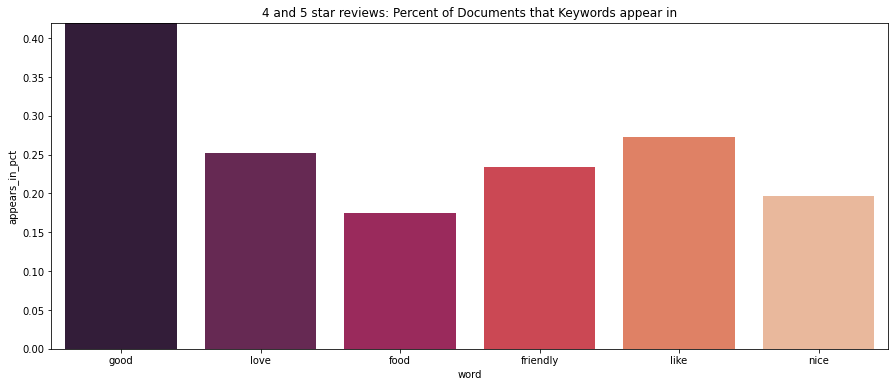

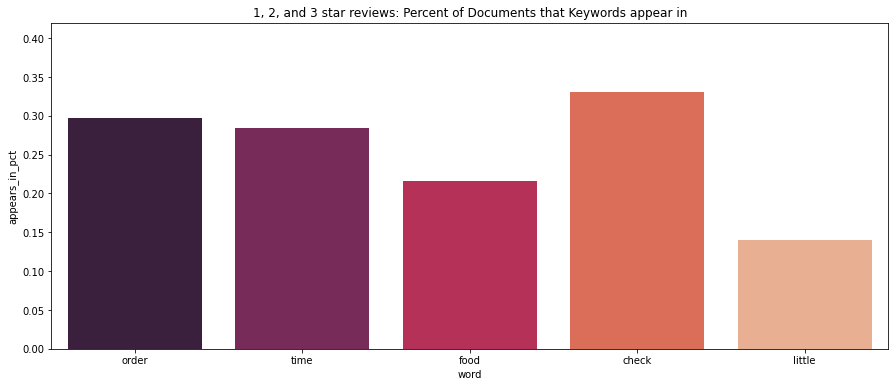

In [135]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_pct, palette="rocket", order=good_words);
plt.ylim(0,.42)
plt.show();

plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_pct, palette="rocket", order=bad_words);
plt.ylim(0,.42)
plt.show();

## Can you visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

